For this project we will perform Classification on Iris Dataset with the help of two classifier models


a)KNearestNeighbors(KNN)
b)SupportVectorMachine(SVM)

We will compare their accuracy.

In [90]:
import pandas as pd
import numpy as np

In [91]:
df = pd.read_csv('IRIS.csv')

In [92]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [93]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [94]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Data Preprocessing

Checking for null values 

In [95]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

There are no null values in our dataset

We are converting the 'species' column from categorical to numerical type

In [100]:
df['species']=df['species'].astype('category')
df['species']=df['species'].cat.codes
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [101]:
X=df.drop(columns=['species'])
y=df['species']

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state = 23)

In [103]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
77,6.7,3.0,5.0,1.7
29,4.7,3.2,1.6,0.2
92,5.8,2.6,4.0,1.2
23,5.1,3.3,1.7,0.5
128,6.4,2.8,5.6,2.1
...,...,...,...,...
39,5.1,3.4,1.5,0.2
91,6.1,3.0,4.6,1.4
31,5.4,3.4,1.5,0.4
40,5.0,3.5,1.3,0.3


In [104]:
y_train

77     1
29     0
92     1
23     0
128    2
      ..
39     0
91     1
31     0
40     0
83     1
Name: species, Length: 90, dtype: int8

# l1 Normalizing 

In [105]:
from sklearn.preprocessing import Normalizer

In [106]:
normalizer = Normalizer(norm='l1')

In [107]:
X_train_normalized = normalizer.fit_transform(X_train)

In [108]:
X_train_normalized

array([[0.40853659, 0.18292683, 0.30487805, 0.10365854],
       [0.48453608, 0.32989691, 0.16494845, 0.02061856],
       [0.42647059, 0.19117647, 0.29411765, 0.08823529],
       [0.48113208, 0.31132075, 0.16037736, 0.04716981],
       [0.37869822, 0.16568047, 0.33136095, 0.12426036],
       [0.41984733, 0.17557252, 0.30534351, 0.09923664],
       [0.43037975, 0.17721519, 0.30379747, 0.08860759],
       [0.37647059, 0.16470588, 0.32941176, 0.12941176],
       [0.36024845, 0.17391304, 0.31677019, 0.14906832],
       [0.41447368, 0.16447368, 0.32236842, 0.09868421],
       [0.51041667, 0.32291667, 0.15625   , 0.01041667],
       [0.48076923, 0.32692308, 0.15384615, 0.03846154],
       [0.3559322 , 0.1920904 , 0.31638418, 0.13559322],
       [0.51578947, 0.31578947, 0.14736842, 0.02105263],
       [0.48      , 0.34      , 0.16      , 0.02      ],
       [0.3908046 , 0.17241379, 0.31609195, 0.12068966],
       [0.37419355, 0.17419355, 0.32903226, 0.12258065],
       [0.41353383, 0.18796992,

In [109]:
X_test_normalized=normalizer.transform(X_test)

# MinMax Scaling

In [110]:
from sklearn.preprocessing import MinMaxScaler

In [111]:
scaler = MinMaxScaler()

In [112]:
X_train_scaled = scaler.fit_transform(X_train_normalized)

In [113]:
X_test_scaled = scaler.transform(X_test_normalized)

# Heatmap Analysis

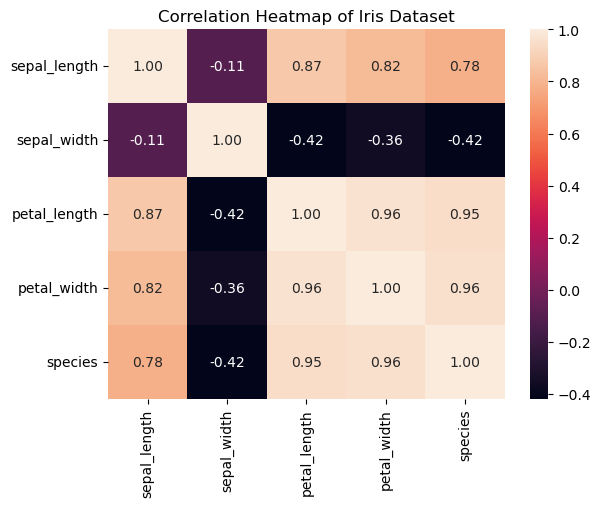

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()

# Classifier Model 

**KNN Classification**

In [115]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)

In [116]:
classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [117]:
y_pred = classifier.predict(X_test_scaled)

In [118]:
from sklearn.metrics import classification_report,confusion_matrix

In [119]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.89      0.94      0.92        18
           2       0.95      0.90      0.93        21

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



**Support Vector Machine**

In [120]:
from sklearn import svm

In [121]:
svc = svm.SVC()

In [122]:
svc.fit(X_train_scaled,y_train)

SVC()

In [123]:
y_pred_test=svc.predict(X_test_scaled)

In [124]:
y_pred_test

array([2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0,
       1, 2, 2, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2], dtype=int8)

In [125]:
svc.score(X_test_scaled,y_test)

0.9666666666666667

In [126]:
from sklearn.metrics import classification_report,confusion_matrix

In [127]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.90      1.00      0.95        18
           2       1.00      0.90      0.95        21

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



# Comparison

From the two models, KNN and SVM, we can see that for the IRIS dataset, SVM is working more efficiently than KNN.